In [6]:
# import libraries
import pandas as pd
from pytrends.request import TrendReq

### Get data from google trends API

In [5]:
pytrends = TrendReq(hl='it-IT', tz=15)

In [42]:
words_list = [
    "Vacanze",
    "Viaggi",
    "Gita",
    "Google Maps",
    "Traffico",
    "Traffico Milano",
    "Mare",
    "Montagna",
    "Lago Garda",
    #"Lago Como",
    #"Lago Iseo",
    #"Lago Lugano",
    #"Lago Maggiore",
    #"Lago Orta",
    #"Gardaland",
    #"Verona",
    #"Venezia",
    #"Svizzera",
    #"Austria",
    #"Trentino-South Tyrol",
    #"Liguria",
    #"Riviera Romagnola",
    #"Agrate Brianza",
    #"Provincia Monza Brianza",
    "Santo Ambrogio",
    "Halloween",
    "Natale",
    "Pasqua",
    "Ferragosto",
    "Capodanno",
    #"Fiera",
    #"Sagra",
    #"Manifestazione",
    #"Festa",
    #"Evento",
    #"Carnevale venezia",
    #"Eventi Monza",
    #"Feste Monza",
    "Partita milan",
    "Partita inter",
    "Partita juventus",
    "champions league",
    "Partita calcio",
    #"Formula 1",
    "Previsioni del tempo",
    "Pioggia",
    "Neve",
    "Meteo",
    "Meteo Agrate",
    "autostrada A4",
    #"Acqua e farina agrate",
    #"Gruppo ethos ristoranti",
    #"Ristoranti Agrate",
    "Pizza",
    #"Sushi",
    "Ristorante"
]

In [8]:
# get hourly data from google trends
for key_word in words_list:
    df = pytrends.get_historical_interest(keywords=[key_word],
         year_start=2021,month_start=6, day_start=1, hour_start=0,
         year_end=2022, month_end=12, day_end=1, hour_end=0,
         cat=0, geo='IT-25', gprop='', sleep=0)
    if "isPartial" in df.columns:
        df.drop(columns=['isPartial'], inplace=True)
    df.to_csv('data/' + key_word + '.csv')

The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The requ

### Preprocess test

In [81]:
df = pd.read_csv('data/Vacanze.csv')
df["date"] = df["date"].apply(lambda x : pd.to_datetime(x).date())
df

,date,Vacanze
0,2021-06-01,0
1,2021-06-01,0
2,2021-06-01,0
3,2021-06-01,0
4,2021-06-01,0
...,...,...
10691,2022-11-30,53
10692,2022-11-30,60
10693,2022-11-30,47
10694,2022-11-30,57


In [82]:
df = df.groupby("date").mean()
df

,Vacanze
date,
2021-06-01,6.125000
2021-06-02,8.458333
2021-06-03,7.083333
2021-06-04,6.166667
2021-06-05,6.375000
...,...
2022-11-27,0.000000
2022-11-28,0.000000
2022-11-29,45.920000


In [83]:
# expand data with missing dates
df = df.reindex(pd.date_range(start="2021-06-01", end="2022-12-01", freq='D'))
df.index.name = "date"
df

,Vacanze
date,
2021-06-01,6.125000
2021-06-02,8.458333
2021-06-03,7.083333
2021-06-04,6.166667
2021-06-05,6.375000
...,...
2022-11-27,0.000000
2022-11-28,0.000000
2022-11-29,45.920000


In [84]:
# count nan values
df.isna().sum()

Vacanze    94
dtype: int64

In [85]:
# fill nan values with 0
df.fillna(0, inplace=True)

<AxesSubplot:xlabel='date'>

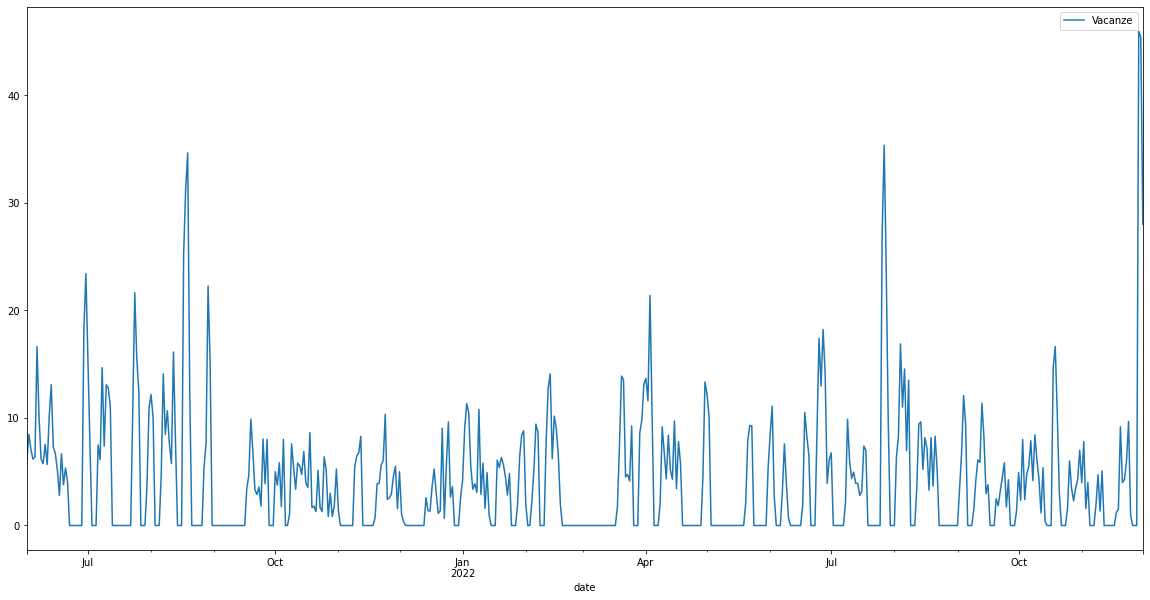

In [86]:
df.plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

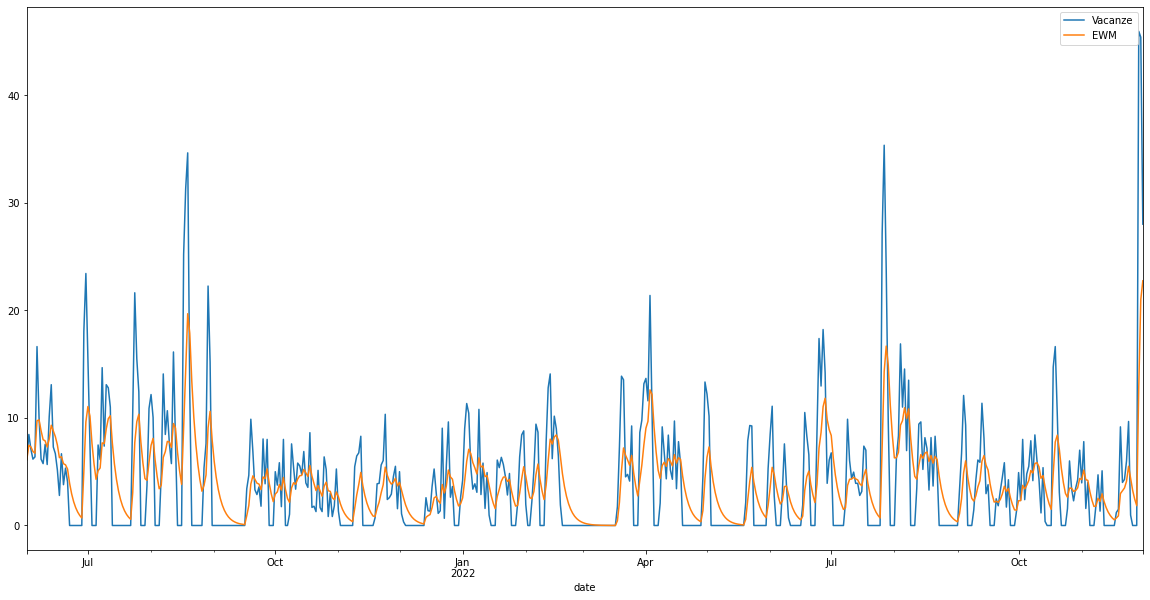

In [87]:
# exponential weighted moving average
df["EWM"] = df.ewm(span=7).mean()
df.plot(figsize=(20,10))

### Preprocess

In [88]:
# preprocess all the data
for key_word in words_list:
    df = pd.read_csv('data/' +key_word + '.csv')
    print(key_word)
    print(df)
    df["date"] = df["date"].apply(lambda x : pd.to_datetime(x).date())
    df = df.groupby("date").mean()
    df = df.reindex(pd.date_range(start="2021-06-01", end="2022-12-01", freq='D'))
    df.index.name = "date"
    df.fillna(0, inplace=True)
    df[key_word] = df.ewm(span=7).mean()
    df.to_csv('data_preprocessed/' + key_word + '_processed.csv')

Vacanze
                      date  Vacanze
0      2021-06-01 00:00:00        0
1      2021-06-01 01:00:00        0
2      2021-06-01 02:00:00        0
3      2021-06-01 03:00:00        0
4      2021-06-01 04:00:00        0
...                    ...      ...
10691  2022-11-30 20:00:00       53
10692  2022-11-30 21:00:00       60
10693  2022-11-30 22:00:00       47
10694  2022-11-30 23:00:00       57
10695  2022-12-01 00:00:00       28

[10696 rows x 2 columns]
Viaggi
                      date  Viaggi
0      2021-06-01 00:00:00       0
1      2021-06-01 01:00:00       0
2      2021-06-01 02:00:00       0
3      2021-06-01 03:00:00       0
4      2021-06-01 04:00:00       0
...                    ...     ...
11705  2022-11-30 20:00:00      76
11706  2022-11-30 21:00:00      75
11707  2022-11-30 22:00:00      84
11708  2022-11-30 23:00:00      77
11709  2022-12-01 00:00:00      77

[11710 rows x 2 columns]
Gita
                     date  Gita
0     2021-06-01 00:00:00     0
1     2021-0

In [89]:
# concat all the dataframes of the preprocessed data
for key_word in words_list:
    df = pd.read_csv('data_preprocessed/' +key_word + '_processed.csv')
    if key_word == "Vacanze":
        df_concat = df
    else:
        df.drop(columns=['date'], inplace=True)
        df_concat = pd.concat([df_concat,df], axis=1)


In [90]:
df_concat

,date,Vacanze,Viaggi,Gita,Google Maps,Traffico,Traffico Milano,Mare,Montagna,Lago Garda,...,champions league,Partita calcio,Previsioni del tempo,Pioggia,Neve,Meteo,Meteo Agrate,autostrada A4,Pizza,Ristorante
0,2021-06-01,6.125000,3.708333,3.500000,4.458333,2.000000,1.791667,16.208333,2.333333,0.000000,...,3.250000e+00,0.000000,1.250000,2.916667,1.750000,17.333333,2.458333,6.500000,0.000000,13.458333
1,2021-06-02,7.458333,5.660714,5.309524,3.386905,5.000000,1.148810,17.755952,3.976190,0.000000,...,2.107143e+00,0.000000,4.583333,2.511905,1.107143,19.904762,1.220238,7.690476,0.000000,16.458333
2,2021-06-03,7.296171,7.753378,3.229730,3.922297,3.576577,1.246622,18.762387,3.518018,0.000000,...,2.132883e+00,0.000000,3.934685,1.894144,1.619369,19.063063,3.575450,5.644144,0.000000,14.800676
3,2021-06-04,6.883095,6.715952,3.252381,4.179286,3.975238,1.110714,19.611190,4.105714,0.000000,...,3.166190e+00,0.289524,4.034762,4.767143,1.971905,22.666667,2.877381,4.875238,0.000000,14.538333
4,2021-06-05,6.716549,5.798389,2.486769,4.803404,2.972685,1.006135,18.208974,3.593043,0.000000,...,3.767286e+00,0.344857,3.886790,3.491357,2.513764,27.323944,5.621799,3.878148,0.000000,16.164693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2022-11-27,2.456444,2.702952,1.177987,10.633998,0.917924,2.933326,3.543927,0.016057,4.135375,...,2.499936e-21,3.270222,0.266656,2.779866,5.863150,14.313064,2.907862,0.605121,1.855860,20.735807
545,2022-11-28,1.842333,2.568880,0.883490,10.121332,0.688443,3.033328,4.324612,0.012043,3.768198,...,1.874952e-21,4.567250,0.199992,2.282817,5.532779,14.495215,4.472563,0.453840,1.391895,19.697688
546,2022-11-29,12.861750,18.706660,4.037618,20.320999,6.026749,3.604996,17.373459,12.561115,10.266148,...,1.406214e-21,8.725437,5.327077,2.992112,13.339584,16.321411,5.114423,0.767464,4.543921,21.533266
547,2022-11-30,20.990062,30.759162,6.517796,28.667832,13.738812,7.630830,27.915511,21.566670,15.272528,...,1.054660e-21,11.398245,7.807808,3.244084,20.213022,17.303558,5.294150,1.565181,7.126691,23.441616


In [91]:
# check for nan values
df_concat.isna().sum().sum()

0

### Save final result

In [92]:
# save the final dataframe
df_concat.to_csv('df_exogenous.csv')